In [1]:
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
rng = np.random.default_rng(seed=42)
import dionysus as d
import gudhi as gd
from tdafunction import *
from sklearn.decomposition import PCA
from gudhi import AlphaComplex


Load the pre-saved LINES dataset, which consists of a collection of $10 \times 10$ patches. The number of patches is $250$.

In [2]:
# load the dataset

f = open('./dataset/lines.pckl', 'rb')
imgs = pickle.load(f)
f.close()

Implement the PCA method to reduce the dimension, and normalize the points.

In [3]:
n_components = 5
pca = PCA(n_components=n_components)
pca.fit(imgs)
imgs_pca = pca.transform(imgs)
maximum = max([np.linalg.norm(imgs_pca[i]) for i in range(250)])
imgs_pca /= maximum

In [4]:
# Construct alpha complex using Gudhi
ac = AlphaComplex(points = imgs_pca) 
stree = ac.create_simplex_tree()
print('Alpha complex is of dimension ', stree.dimension(), ' - ',
  stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')

Alpha complex is of dimension  5  -  285631  simplices -  250  vertices.


Draw persistent diagram.

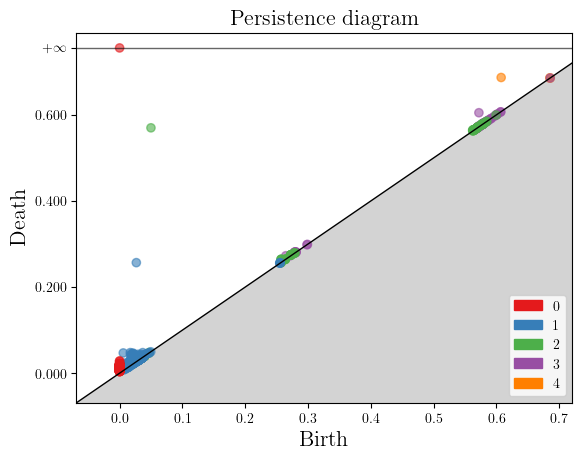

In [5]:
diag = stree.persistence(homology_coeff_field=2, persistence_dim_max=3) #By the duality over Z/2, persistent homology and cohomology are the same
gd.plot_persistence_diagram(diag)
plt.show()

Now we compute the persistent Stiefel-Whitney classes of type $2$ on $[0.1,0.2]$.

In [6]:
s = 0.1
t = 0.2
value = 0.2
value_stree = ac.create_simplex_tree(max_alpha_square=value)
fsimplices = []
for fspx in value_stree.get_filtration():
        fsimplices.append(fspx)
f = d.Filtration(fsimplices)
cm = d.cohomology_persistence(f,prime=2)
cdgms = d.init_diagrams(cm,f)

In [7]:
sw1 = pers_sw_class(f,1,2,s,t)
sw2 = pers_sw_class(f,2,2,s,t)

idx1 = kth_longest_index(cdgms, 1, 1)
idx2 = kth_longest_index(cdgms, 2, 1)

cocycle1 = get_cocycles(cm,f,cdgms, 1, idx1)
cocycle2 = get_cocycles(cm,f,cdgms, 2, idx2)

cob_mat1 = coboundary_matrix(f,1)
cob_mat2 = coboundary_matrix(f,2)

In [8]:
is_cohomologous(cob_mat1, sw1, cocycle1)

True

In [9]:
is_cohomologous(cob_mat1, sw2, cocycle2)

True

So the longest two barcodes in dimension $1,2$ are the persistent Stiefel-Whitney classes.

In [10]:
stree = ac.create_simplex_tree()
fsimplices = []
for fspx in stree.get_filtration():
        fsimplices.append(fspx)
f = d.Filtration(fsimplices)
cm = d.cohomology_persistence(f,prime=2)
cdgms = d.init_diagrams(cm,f)

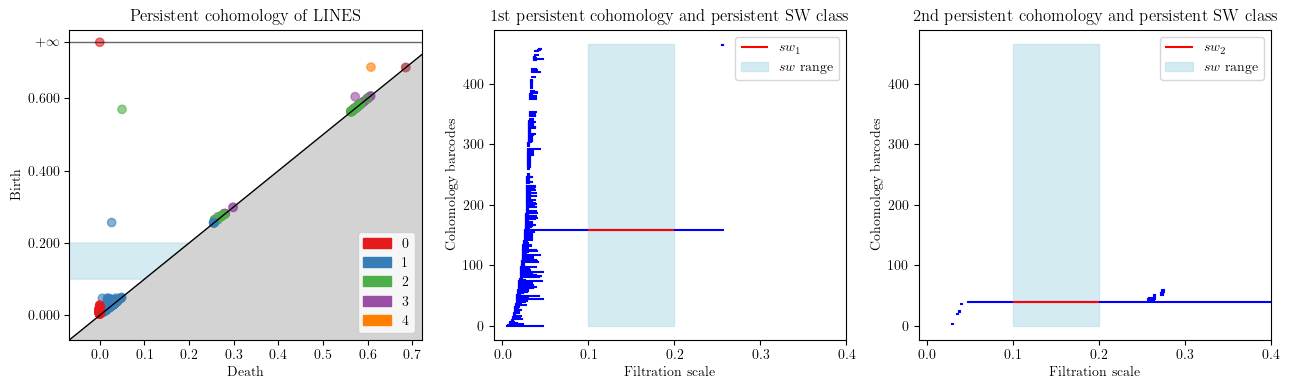

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

gd.plot_persistence_diagram(diag,axes=axes[0])
axes[0].set_title("Persistent cohomology of LINES")
axes[0].fill([-0.1,-0.1,t,s],[s,t,t,s], color = 'lightblue', alpha=0.5, label = 'SW range')
axes[0].set_xlabel('Death',size=10)
axes[0].set_ylabel('Birth',size=10)
#axes[0].legend()

d.plot.plot_bars(cdgms[1],ax=axes[1])
axes[1].hlines(idx1,s,t,colors="red",label="$sw_1$")
axes[1].set_title("1st persistent cohomology and persistent SW class")
axes[1].fill([s,s,t,t],[0,len(cdgms[1]),len(cdgms[1]),0], color = 'lightblue', alpha=0.5, label = '$sw$ range')
axes[1].set_xlabel('Filtration scale')
axes[1].set_xlim(-0.01,0.4)
axes[1].set_ylabel('Cohomology barcodes')
axes[1].legend()

d.plot.plot_bars(cdgms[2],ax=axes[2])
axes[2].hlines(idx2,s,t,color = 'red', label = '$sw_2$')
axes[2].set_title("2nd persistent cohomology and persistent SW class")
axes[2].fill([s,s,t,t],[0,len(cdgms[1]),len(cdgms[1]),0], color = 'lightblue', alpha=0.5, label = '$sw$ range')
axes[2].set_xlabel('Filtration scale')
axes[2].set_xlim(-0.01,0.4)
axes[2].set_ylabel('Cohomology barcodes')
axes[2].legend()

fig.tight_layout()
fig.savefig("fig2.pdf",format="pdf")